In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv('full_onion_data.csv')

In [109]:
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [110]:
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)


In [111]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")

In [112]:
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))

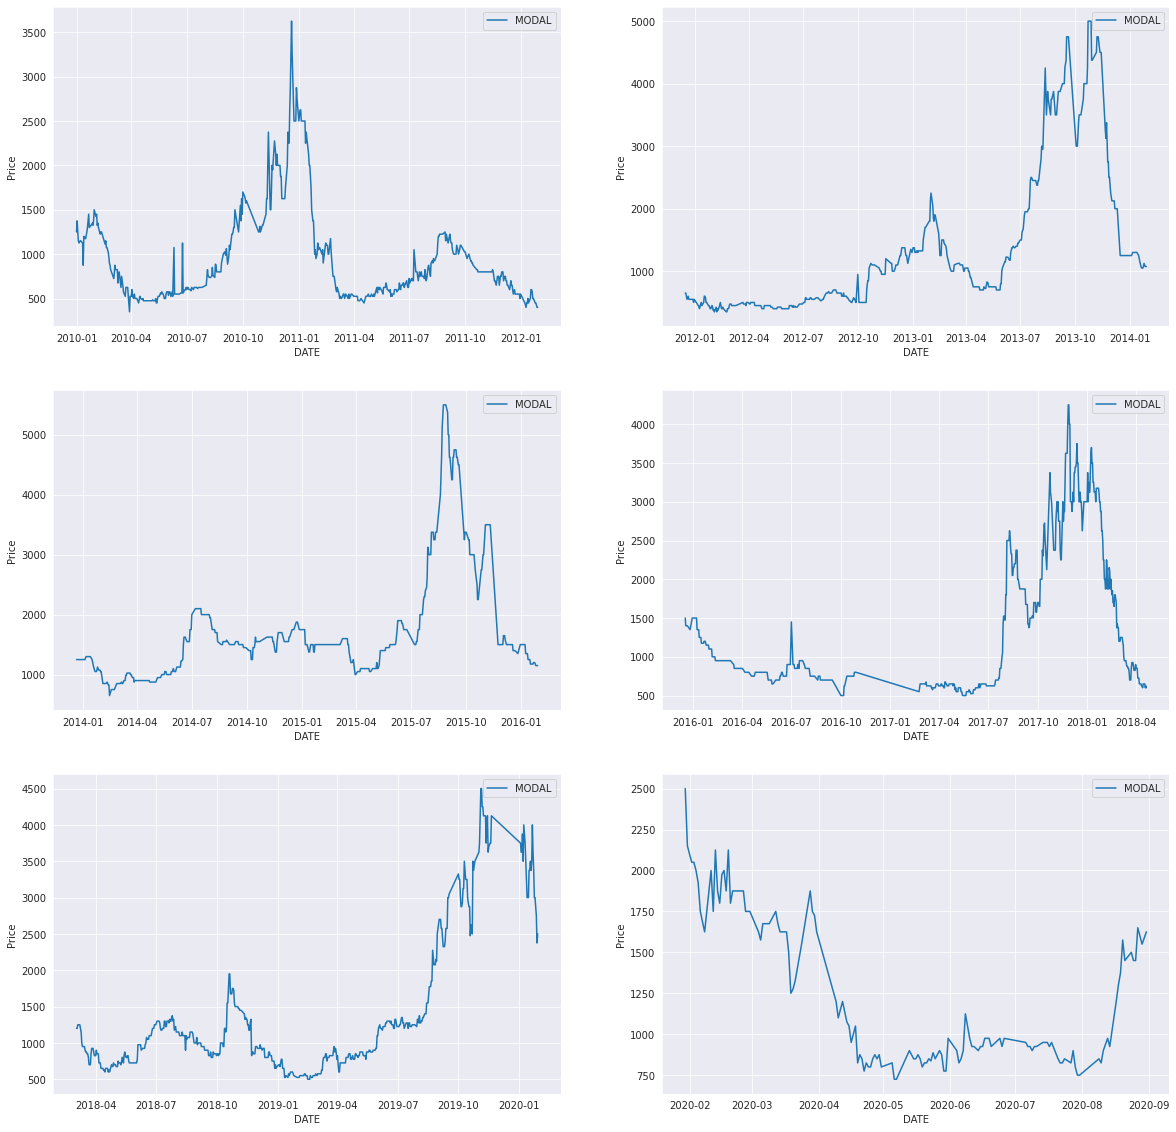

In [113]:
import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(3,2, figsize=(20,20))
sns.lineplot(data= df[2194:], ax= axes[0,0])
sns.lineplot(data= df[1715:2220], ax= axes[0,1])
sns.lineplot(data= df[1275:1740], ax= axes[1,0])
sns.lineplot(data= df[700:1300], ax= axes[1,1])
sns.lineplot(data= df[144:750], ax= axes[2,0])
sns.lineplot(data= df[:144], ax= axes[2,1])
axes[0,0].set_ylabel('Price')
axes[0,1].set_ylabel('Price')
axes[1,0].set_ylabel('Price')
axes[1,1].set_ylabel('Price')
axes[2,0].set_ylabel('Price')
axes[2,1].set_ylabel('Price')
plt.show()

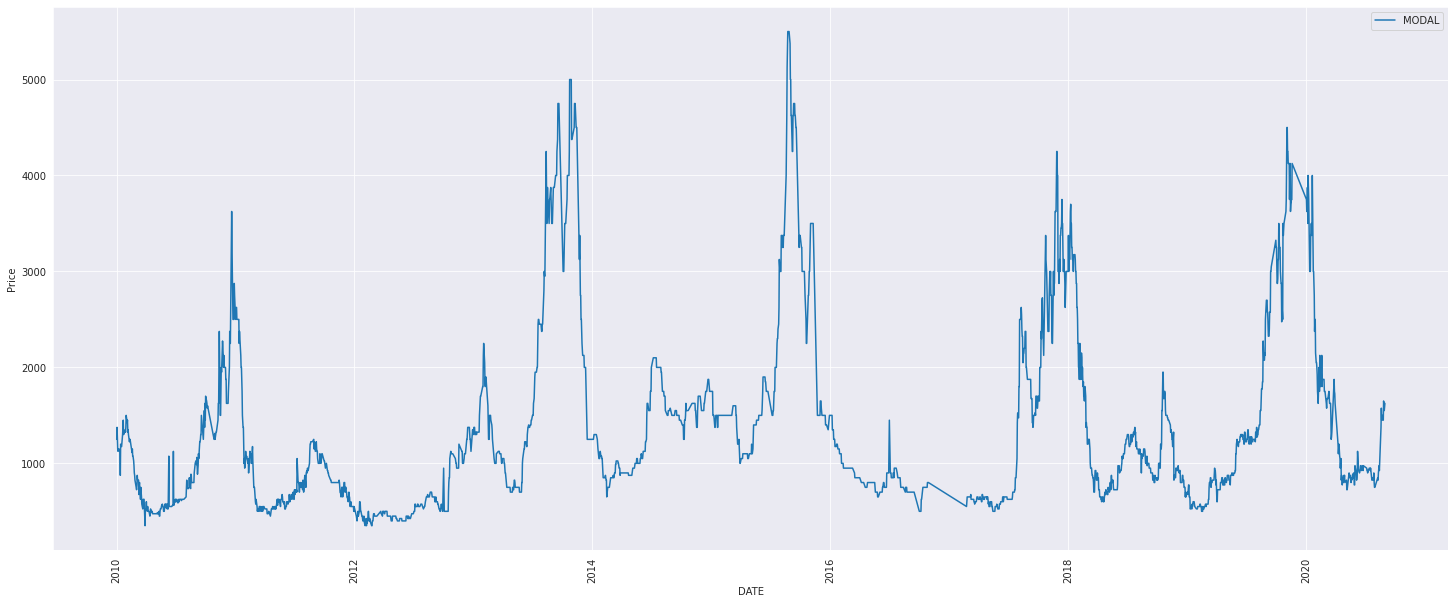

In [114]:
fig, ax = plt.subplots(figsize= (25,10))
sns.lineplot(data= df, ax= ax)
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Month Resample plots


In [173]:
month_sampled = df.resample('1M')

In [174]:
# month_sampled = month_sampled.interpolate(method='linear')
month_sampled = month_sampled.mean()


In [175]:
month_sampled.head(10)

,MODAL
DATE,
2010-01-31,1246.250000
2010-02-28,1173.000000
2010-03-31,678.571429
2010-04-30,497.875000
2010-05-31,511.285714
2010-06-30,611.227273
2010-07-31,616.200000
2010-08-31,807.950000
2010-09-30,1229.777778


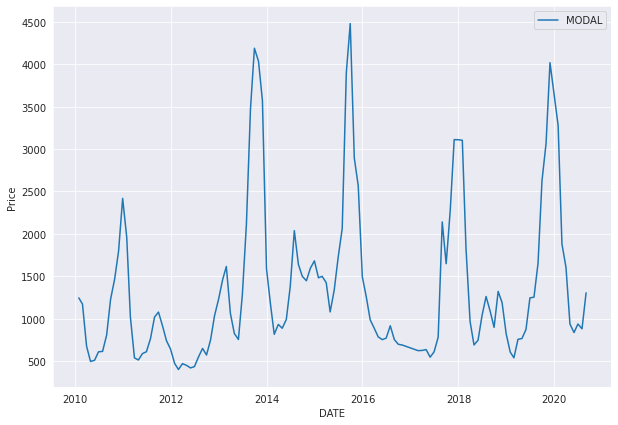

In [176]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = month_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()

In [177]:
year_sampled = df.resample('1Y')
year_sampled = year_sampled.mean()
year_sampled.head(10)

,MODAL
DATE,
2010-12-31,1053.514894
2011-12-31,868.092827
2012-12-31,602.610879
2013-12-31,2001.687764
2014-12-31,1358.411504
2015-12-31,2151.401869
2016-12-31,860.512821
2017-12-31,1499.221453
2018-12-31,1251.478873


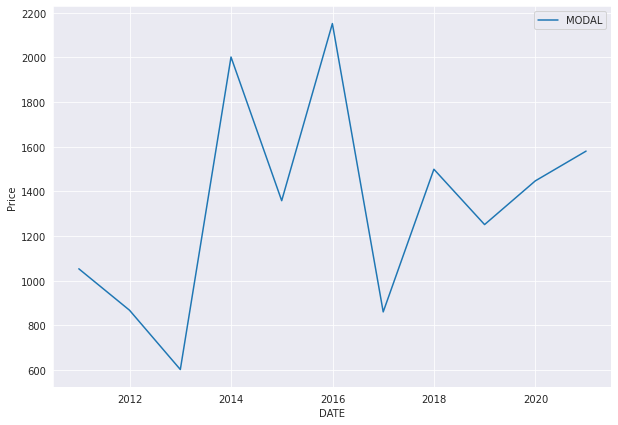

In [178]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data = year_sampled, ax= ax)
ax.set_ylabel('Price')
plt.show()